# Classifying text using Naive Bayes

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. So here is model which can predict the catergory of article based on strings provided our hypothesis.

Let's begin with base imports:

In [1]:
import numpy as np # for matrix maths 
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns; sns.set() # for beautiful plotting 

%matplotlib inline

Lets download the data and list target names:

In [2]:
# downloading data 
from sklearn.datasets import fetch_20newsgroups

# loading data set
data = fetch_20newsgroups()

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity we are just going to take some of them

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

Here is the representative entry from data

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for ML we need to make the use of TF-IDF vectorizer from feature engineering

In [5]:
# importing tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
# importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline # to make pipeline 

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [6]:
# fitting data into model 
model.fit(train.data,train.target)

labels = model.predict(test.data)

lets make a confusion matrix and plot it as a heat map of `seaborn`

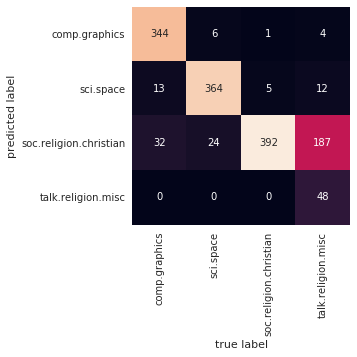

In [7]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Lets make a quick utiliy function to predict any string that is been entered to this model 

In [8]:
# function 
def predict_category(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Lets try out

In [9]:
predict_category('sending a payload to ISS')

'sci.space'

In [10]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [11]:
predict_category('determining the screen resolution')

'comp.graphics'